# Getting Started

In [133]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")



In [134]:
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv('test.csv')

In [135]:
train0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [136]:
test0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

# Combining Train and Test Sets

We combine the trainig and testing data now and perform data cleaning. After this is done we split the data. 

In [137]:
target = train0['SalePrice']
test_ids = test0['Id']

train1 = train0.drop(['Id', 'SalePrice'], axis=1)
test1 = test0.drop('Id', axis=1)

data1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,

In [138]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Cleaning

In [139]:
data2 = data1.copy()

## Finding Number of Missing Data points

In [140]:
num_vars = data1.columns[data1.dtypes != 'object']
cat_vars = data1.columns[data1.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Centra

## Missing Numerical Variables

In [141]:
miss_num_vars = data1[num_vars].isnull().sum().sort_values(ascending=False)
miss_num_vars = miss_num_vars[miss_num_vars>0]
miss_num_vars

percent_num_miss = miss_num_vars/len(data1)*100
print(percent_num_miss)

LotFrontage     16.649538
GarageYrBlt      5.447071
MasVnrArea       0.787941
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
TotalBsmtSF      0.034258
GarageCars       0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
GarageArea       0.034258
dtype: float64


## Missing Categorical Variables

In [142]:
miss_cat_vars = data1[cat_vars].isnull().sum().sort_values(ascending=False)
miss_cat_vars = miss_cat_vars[miss_cat_vars>0]

meaningfulNA =['MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType']

miss_cat_vars1 = miss_cat_vars[meaningfulNA].sort_values(ascending=False)
percent_cat_miss = miss_cat_vars1/len(data1)*100
print(percent_cat_miss)

MasVnrType     60.500171
MSZoning        0.137033
Utilities       0.068517
Functional      0.068517
Exterior1st     0.034258
Exterior2nd     0.034258
Electrical      0.034258
KitchenQual     0.034258
SaleType        0.034258
dtype: float64


## Ensuring Proper Data Types

We are converting the numeric data type to string data type for the feature MSSubClass because this feature is numerically encoded.

In [143]:
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

## Filling Categorical Missing Values

Here we fill the missing values in the categorical data type by imputing with a constant value or with the mode of the column

In [144]:
# Imputation using a constant value where NA has some meaning
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data2[column] = data2[column].fillna("None")

# Imputation using the column mode for colums that have missing values
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

In [145]:
data3 = data2.copy()

## Handling Numeric Missing Values

In [146]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

 # ytrain are all the values of na_target that donot have a missing valeu
 # X_train are all the values in the rest of the data in na_target that donot have missing values
 # X_test are all the values in na_target that do have missing values

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    df.loc[df[na_target].isna() == True, na_target] = y_pred
# we fill the missing values using the y_pred values
    return df

In [147]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    data3 = knn_impute(data3, column)  

In [148]:
data4 = data3.copy()

# Feature Engineering

In [149]:
data4["SqFtPerRoom"] = data4["GrLivArea"] / (data4["TotRmsAbvGrd"] +
                                                       data4["FullBath"] +
                                                       data4["HalfBath"] +
                                                       data4["KitchenAbvGr"])

data4['Total_Home_Quality'] = data4['OverallQual'] + data4['OverallCond']

data4['Total_Bathrooms'] = (data4['FullBath'] + (0.5 * data4['HalfBath']) +
                               data4['BsmtFullBath'] + (0.5 * data4['BsmtHalfBath']))

data4["HighQualSF"] = data4["1stFlrSF"] + data4["2ndFlrSF"]

In [150]:
data5 = data4.copy()

# Feature Transformations

## Log Transform for Skewed Features

In [151]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


### If we apply log transform to a skewed data set, it helps it look more normally distributed

In [152]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data5[column] = np.log1p(data5[column])
    
"""since a few values in the skew_df is 0, performaing log transform for these 0 values would not be possible becasue of lag at 0 is undefined.
That is why we use np.log1p(data5[column]). This is a NumPy function that calculates the natural logarithm of (1 + x), where x is the input value. 
The 1 is added to the value before taking the logarithm. 
This is done to handle cases where the values in the column may include zeros or very small numbers (close to zero) that would result in undefined or negative logarithms if you tried to take the logarithm directly."""

'since a few values in the skew_df is 0, performaing log transform for these 0 values would not be possible becasue of lag at 0 is undefined.\nThat is why we use np.log1p(data5[column]). This is a NumPy function that calculates the natural logarithm of (1 + x), where x is the input value. \nThe 1 is added to the value before taking the logarithm. \nThis is done to handle cases where the values in the column may include zeros or very small numbers (close to zero) that would result in undefined or negative logarithms if you tried to take the logarithm directly.'

## Cosine Transform for Cyclical Features

In [153]:
data4['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

We know that the value for month does not have a purely numeric meaning. We will have to give the data a cyclic meaning for the model to understand the meaning of the data. For example: We can define a realtionship between December and January being colder months and June being a warmer month.To do this we can use a trigonometric function to align the values to the function to give them a cyclic relationship.
To do this we use the function -cos(cx). Here C= 0.5236. We use desmos.com to find the optimum value of C so that the realtionship between the month is defined based on our requirements.

In [154]:
data4['MoSold'] = (-np.cos(0.5236 * data5['MoSold']))

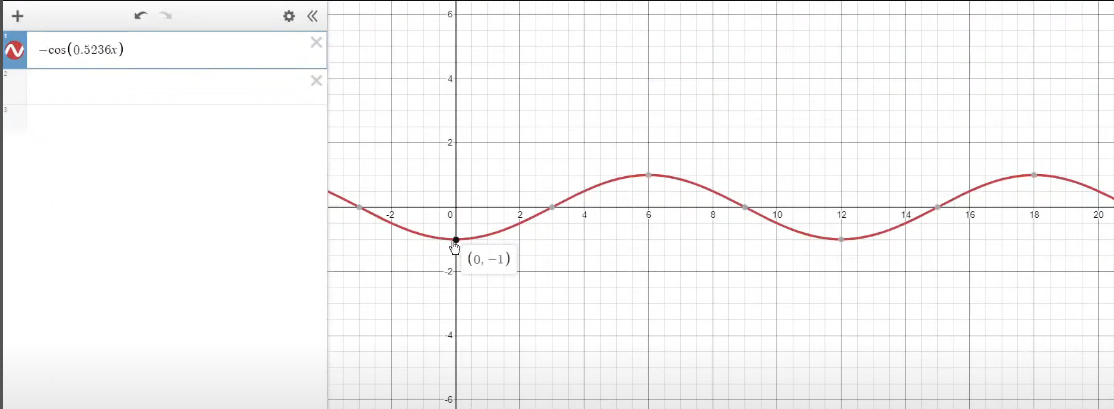

In [155]:
data6 = data5.copy()

# Encode Categoricals

In [156]:
data6 = pd.get_dummies(data6)

In [157]:
data7 = data6.copy()

# Scaling

Feature Scaling is performed to normalize the features so that the mean is 0 and the standard deviation is 1 

In [158]:
scaler = StandardScaler()
scaler.fit(data7)

data7 = pd.DataFrame(scaler.transform(data7), index=data7.index, columns=data7.columns)

""" The index parameter ensures that the index (row labels) of the new DataFrame remains the same as the original data7 DataFrame. 
 The columns parameter ensures that the column names of the new DataFrame remain the same as the original data7 """

' The index parameter ensures that the index (row labels) of the new DataFrame remains the same as the original data7 DataFrame. \n The columns parameter ensures that the column names of the new DataFrame remain the same as the original data7 '

In [159]:
data7

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functio

In [160]:
data8 = data7.copy()

# Target Transformation

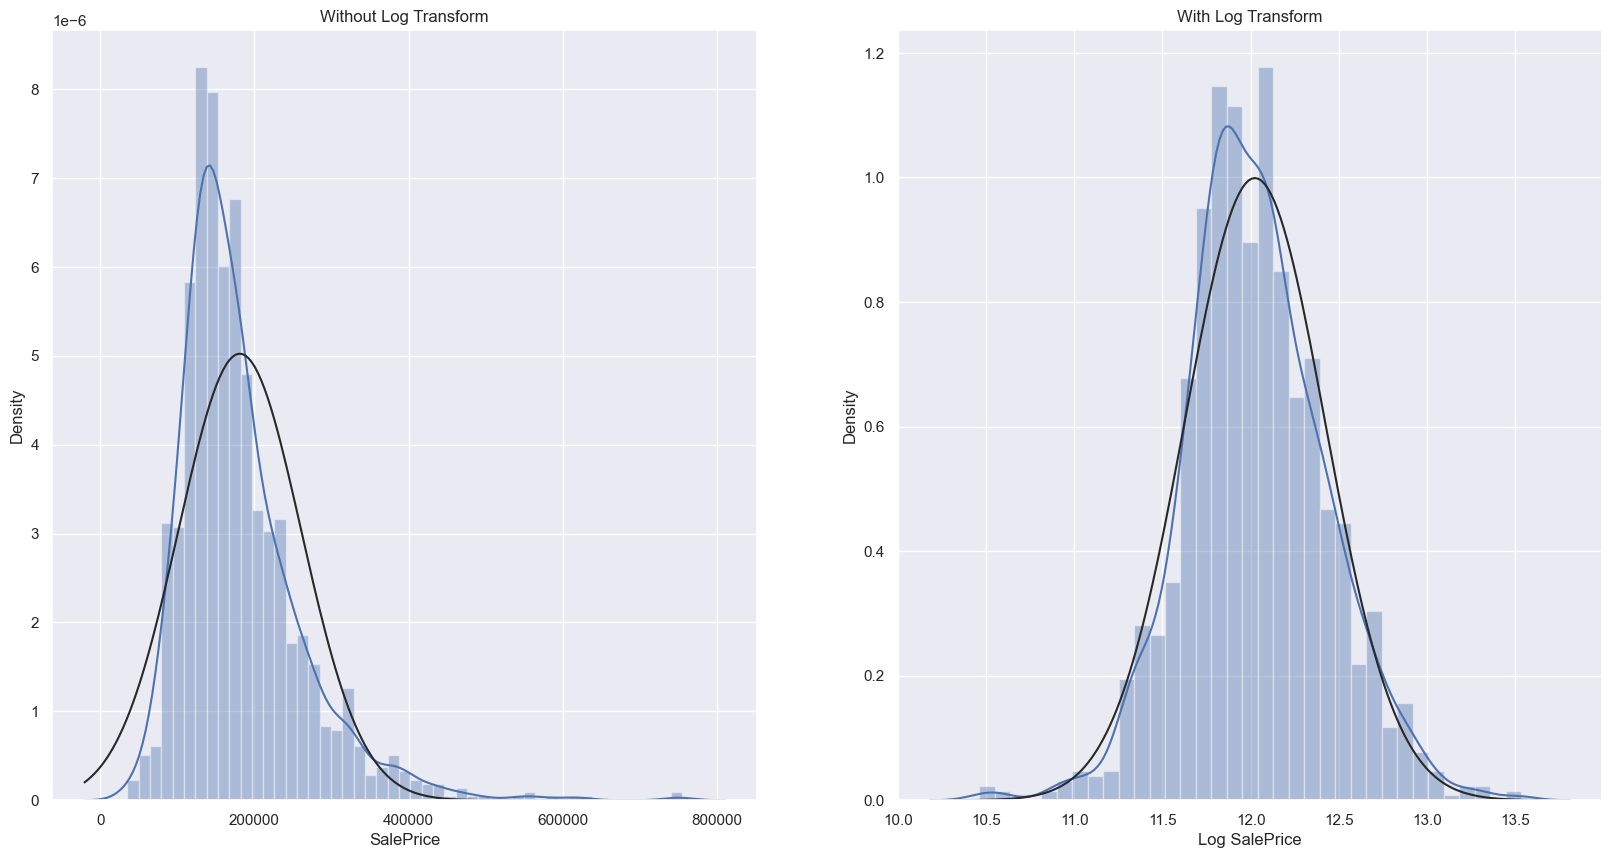

In [161]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)

''' Kernel Density Estimation (KDE) is a non-parametric statistical technique used 
for estimating the probability density function (PDF) of a continuous random variable. 
It is a method for smoothing a dataset to obtain an estimate of the underlying probability distribution. '''

plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [162]:
log_target = np.log(target)

# Split Data

In [163]:
train_final = data8.loc[:train0.index.max(), :].copy()
test_final = data8.loc[train0.index.max() + 1:, :].reset_index(drop=True).copy()

In [164]:
train_final.to_csv('train_final.csv', index=False)
test_final.to_csv('test_final.csv', index=False)

In [165]:
train_final = pd.read_csv('train_final.csv')
#log_target = np.log(train_final['SalePrice']) 
train_final['Log_SalePrice'] = log_target

train_final.to_csv('train_final.csv', index=False)


In [166]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functio

In [167]:
import pandas as pd
import numpy as np


log_target = np.log(target)


log_target_df = pd.DataFrame({'log_target': log_target})


log_target_df.to_csv('log_target.csv', index=False)


In [168]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functio

In [169]:
test_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functio

In [170]:
#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

In [171]:
train_final = pd.read_csv("train_final.csv") 
test_final = pd.read_csv("test_final.csv")

Mean Squared Error (MSE): 0.021718628035521145
Root Mean Squared Error (RMSE): 0.1473724127356309
R-squared (R2): 0.8635910935891937


Text(0.5, 1.0, 'Actual vs. Predicted Log Target')

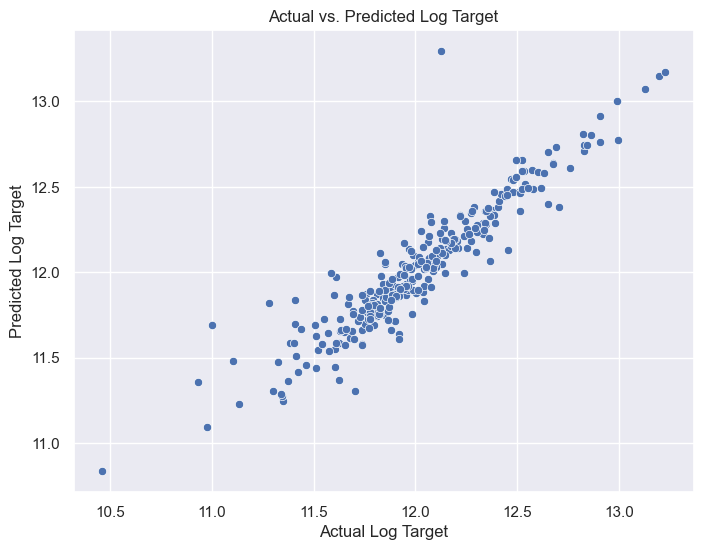

In [172]:

data = pd.read_csv("train_final.csv")


X = data.drop(columns=['Log_SalePrice'])  
log_target = data['Log_SalePrice']  


X_train, X_test, log_target_train, log_target_test = train_test_split(X, log_target, test_size=0.2, random_state=51)

#These values were outliers in the prediction set
X_test =  X_test.drop(250)
log_target_test = log_target_test.drop(250)

X_test =  X_test.drop(325)
log_target_test = log_target_test.drop(325)

X_test =  X_test.drop(375)
log_target_test = log_target_test.drop(375)

X_test =  X_test.drop(197)
log_target_test = log_target_test.drop(197)

X_test =  X_test.drop(1230)
log_target_test = log_target_test.drop(1230)

X_test =  X_test.drop(821)
log_target_test = log_target_test.drop(821)

X_test =  X_test.drop(1170)
log_target_test = log_target_test.drop(1170)

linear = LinearRegression()
linear.fit(X_train, log_target_train)

log_target_pred = linear.predict(X_test)

mse_lin = mean_squared_error(log_target_test, log_target_pred)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(log_target_test, log_target_pred)
print(f"Mean Squared Error (MSE): {mse_lin}")
print(f"Root Mean Squared Error (RMSE): {rmse_lin}")
print(f"R-squared (R2): {r2_lin}")


plt.figure(figsize=(8, 6))
sns.scatterplot(x=log_target_test, y=log_target_pred)
plt.xlabel("Actual Log Target")
plt.ylabel("Predicted Log Target")
plt.title("Actual vs. Predicted Log Target")



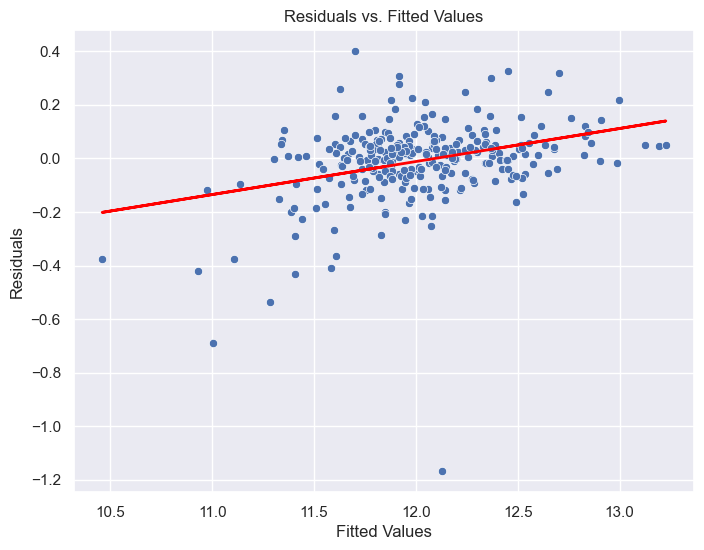

In [173]:
# Calculate and display the R-squared (R2) score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming log_target_pred and log_target_test are Pandas Series
residuals = log_target_test - log_target_pred

# Plot residuals against actual log target values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=log_target_test, y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")

# Fit a linear regression line to the residuals
regression_line = LinearRegression().fit(log_target_test.values.reshape(-1, 1), residuals)
plt.plot(log_target_test, regression_line.predict(log_target_test.values.reshape(-1, 1)), color='red', linewidth=2)

plt.show()

In [174]:
scores_lin = cross_val_score(linear, X_train, log_target_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: -6.44442617238143e+25


# Ridge Regression

In [175]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_train, log_target_train)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best R^2 Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Ridge Model: Ridge()
Best R^2 Score: 0.8531685951897374


In [176]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_train, log_target_train)
ridge_pred = ridge.predict(X_test)
r2_ridge = r2_score(log_target_test, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(log_target_test, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.8632391635414646
RMSE Score: 0.14756239802464413


In [177]:
scores_ridge = cross_val_score(ridge, X_train, log_target_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.8820967223100658


Fitting 5 folds for each of 24 candidates, totalling 120 fits


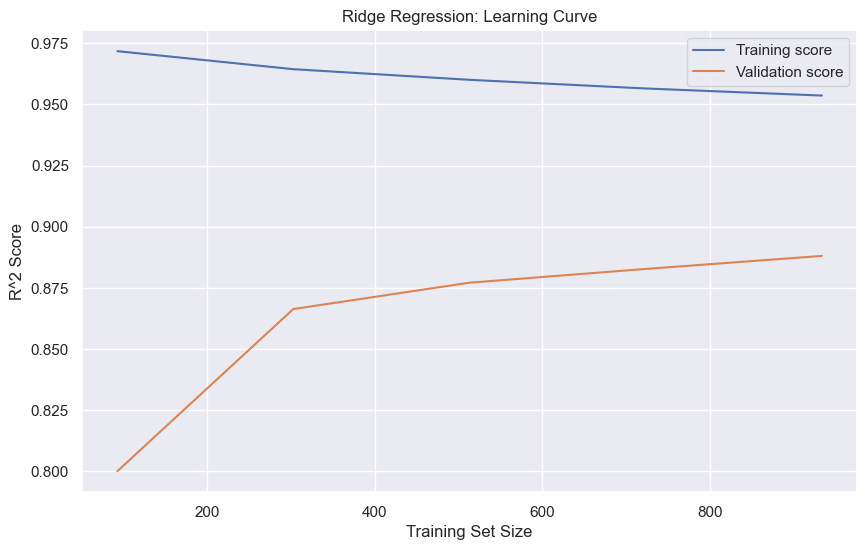

In [178]:
from sklearn.model_selection import learning_curve

parameters_ridge = {"fit_intercept": [True, False], "copy_X": [True, False], "solver": ["auto"], "alpha": [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(Ridge(), parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_train, log_target_train)

# Rest of your code...

# Use the best model for learning curve
best_alpha = grid_ridge.best_params_['alpha']
ridge_for_learning_curve = Ridge(alpha=best_alpha)

train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    ridge_for_learning_curve, X_train, log_target_train, cv=5, scoring='r2'
)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_lc, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores_lc, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R^2 Score')
plt.title('Ridge Regression: Learning Curve')
plt.legend()
plt.show()

# Decision Tree Regression

In [179]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 7)
parameters_dtr = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 3, 5, 10],
    "max_features": ["auto", "log2"]
}
grid_dtr = GridSearchCV(dtreg, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_train, log_target_train)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best DecisionTreeRegressor Model: DecisionTreeRegressor(criterion='friedman_mse', max_features='log2',
                      min_samples_split=10, random_state=7)
Best Score: 0.650165923958681


In [180]:
dtr = grid_dtr.best_estimator_
dtreg.fit(X_train, log_target_train)
dtr_pred = dtreg.predict(X_test)
r2_dtr = r2_score(log_target_pred, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(log_target_pred, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.7870360310338412
RMSE Score: 0.17364382716777313


In [181]:
scores_dtr = cross_val_score(dtreg, X_train, log_target_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.6860960081207368


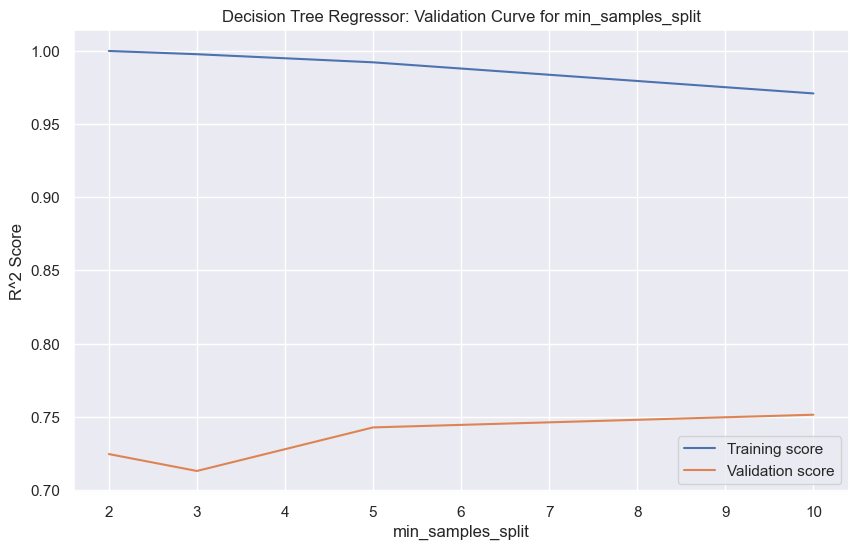

In [182]:
from sklearn.model_selection import validation_curve

param_range = [2, 3, 5, 10]

train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), X_train, log_target_train,
    param_name="min_samples_split", param_range=param_range,
    cv=5, scoring="r2"
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('min_samples_split')
plt.ylabel('R^2 Score')
plt.title('Decision Tree Regressor: Validation Curve for min_samples_split')
plt.legend()
plt.show()


# Random Forest Regression 

In [183]:
rfr = RandomForestRegressor()
paremeters_rf = {
    "n_estimators" : [5, 10, 15],
    "criterion" : ['absolute_error', 'squared_error'],
    "min_samples_split" : [2, 3, 5],
    "max_features" : ["auto", "log2"]
    }
grid_rf = GridSearchCV(rfr, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_train, log_target_train)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best RandomForestRegressor Model: RandomForestRegressor(max_features='log2', min_samples_split=5, n_estimators=10)
Best Score: 0.8452763678389296


In [184]:
rf = grid_rf.best_estimator_
rfr.fit(X_train, log_target_train)
rf_pred = rfr.predict(X_test)
r2_rf = r2_score(log_target_pred, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(log_target_pred, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.9262357404465589
RMSE Score: 0.10219491267530355


In [185]:
scores_rf = cross_val_score(rfr, X_train, log_target_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: 0.8702614088326946


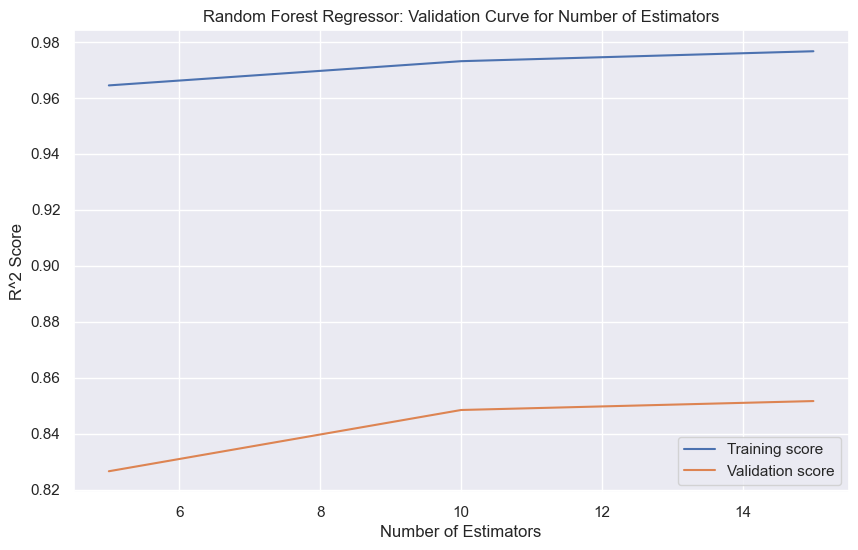

In [186]:
from sklearn.model_selection import validation_curve

param_range_rf = [5, 10, 15]

train_scores_rf, test_scores_rf = validation_curve(
    RandomForestRegressor(), X_train, log_target_train,
    param_name="n_estimators", param_range=param_range_rf,
    cv=5, scoring="r2"
)

plt.figure(figsize=(10, 6))
plt.plot(param_range_rf, np.mean(train_scores_rf, axis=1), label='Training score')
plt.plot(param_range_rf, np.mean(test_scores_rf, axis=1), label='Validation score')
plt.xlabel('Number of Estimators')
plt.ylabel('R^2 Score')
plt.title('Random Forest Regressor: Validation Curve for Number of Estimators')
plt.legend()
plt.show()


# Gradient Boosting Regression

In [187]:
from sklearn import ensemble

In [188]:
params = {'n_estimators': 20000, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'squared_error' , 'max_features' : 20}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, log_target_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features=20,
                          n_estimators=20000)

In [189]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(log_target_pred, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(log_target_pred, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))

R^2 Score: 0.9471286882353485
RMSE Score: 0.08651996319878415


In [190]:
scores_clf = cross_val_score(clf, X_train, log_target_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Cross Validation Score: 0.8968572100628254


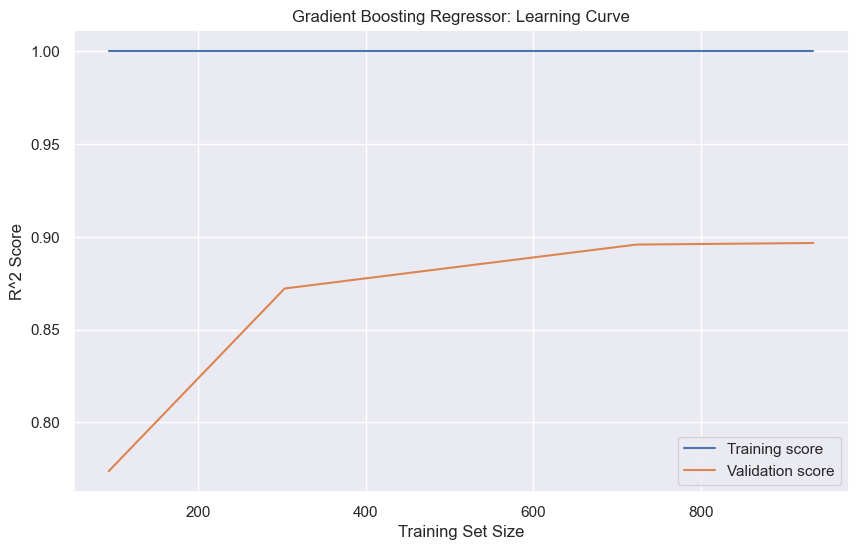

In [191]:
from sklearn.model_selection import learning_curve

train_sizes_clf, train_scores_clf, test_scores_clf = learning_curve(clf, X_train, log_target_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_clf, np.mean(train_scores_clf, axis=1), label='Training score')
plt.plot(train_sizes_clf, np.mean(test_scores_clf, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R^2 Score')
plt.title('Gradient Boosting Regressor: Learning Curve')
plt.legend()
plt.show()


# Lasso Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Lasso Model: Lasso(alpha=0.01)
Best R^2 Score: 0.8959902077654709
R^2 Score: 0.8591329895736423
RMSE Score: 0.14976125783414004
Cross Validation Score: 0.8993757057109806


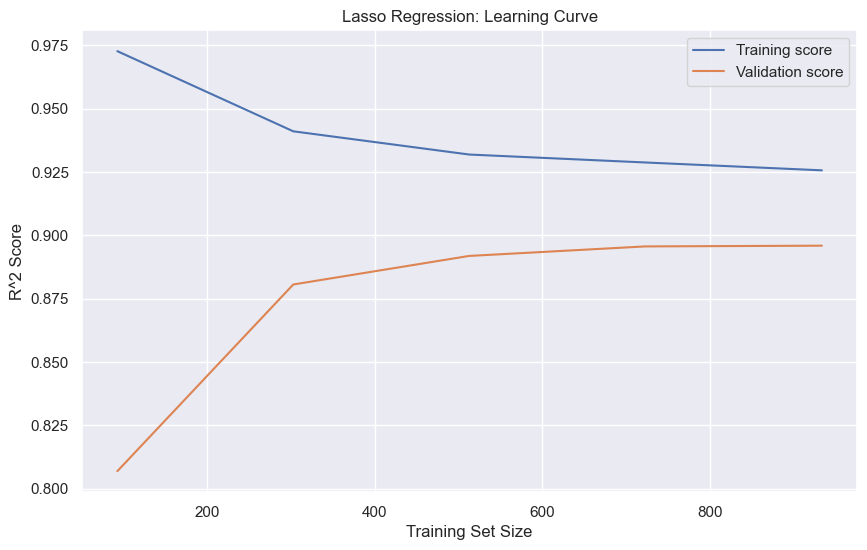

In [192]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# lasso regression
lasso = Lasso()

# hyperparameter tuning
parameters_lasso = {"fit_intercept": [True, False], "alpha": [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(lasso, parameters_lasso, verbose=1, scoring="r2")
grid_lasso.fit(X_train, log_target_train)

print("Best Lasso Model: " + str(grid_lasso.best_estimator_))
print("Best R^2 Score: " + str(grid_lasso.best_score_))

# best Lasso model
lasso = grid_lasso.best_estimator_
lasso.fit(X_train, log_target_train)
lasso_pred = lasso.predict(X_test)
r2_lasso = r2_score(log_target_test, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(log_target_test, lasso_pred))
print("R^2 Score: " + str(r2_lasso))
print("RMSE Score: " + str(rmse_lasso))

# Cross-validation score
scores_lasso = cross_val_score(lasso, X_train, log_target_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lasso)))

# learning curve
best_alpha_lasso = grid_lasso.best_params_['alpha']
lasso_for_learning_curve = Lasso(alpha=best_alpha_lasso)

train_sizes_lasso, train_scores_lc_lasso, test_scores_lc_lasso = learning_curve(
    lasso_for_learning_curve, X_train, log_target_train, cv=5, scoring='r2'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_lasso, np.mean(train_scores_lc_lasso, axis=1), label='Training score')
plt.plot(train_sizes_lasso, np.mean(test_scores_lc_lasso, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression: Learning Curve')
plt.legend()
plt.show()


# PCA

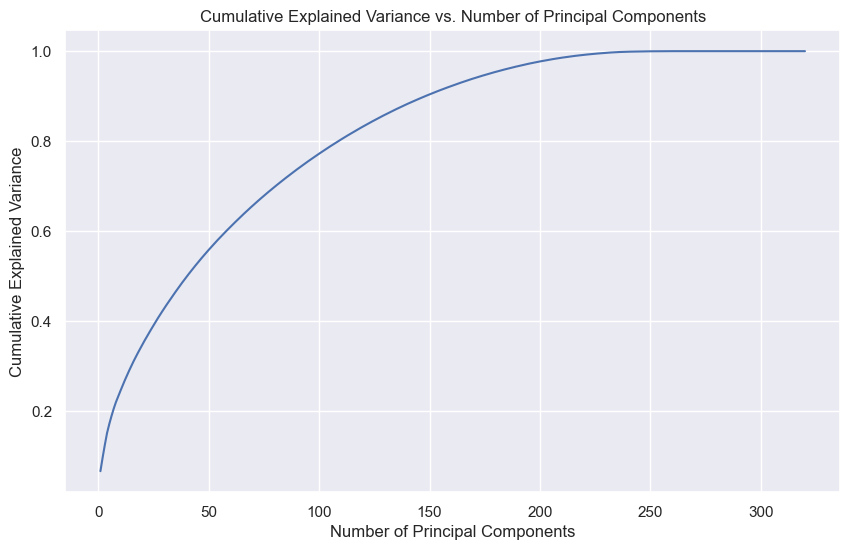

In [193]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot settings
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()



# Model Comparison

In [194]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Decision Tree Regressor", "Random Forest Regressor","Gradient Boosting Regression", "Lasso Regression"],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5],  str(r2_dtr)[0:5], str(r2_rf)[0:5] , str(r2_clf)[0:5], str(r2_lasso)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_ridge)[0:8],  str(rmse_dtr)[0:8], str(rmse_rf)[0:8], str(rmse_clf)[0:8], str(rmse_lasso)[0:8]]
})
model_performances.round(4)

print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


,Model,R Squared,RMSE
4,Gradient Boosting Regression,0.947,0.086519
3,Random Forest Regressor,0.926,0.102194
0,Linear Regression,0.863,0.147372
1,Ridge,0.863,0.147562
5,Lasso Regression,0.859,0.149761
2,Decision Tree Regressor,0.787,0.173643


In [195]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


,Model,R Squared,RMSE
4,Gradient Boosting Regression,0.947,0.086519
3,Random Forest Regressor,0.926,0.102194
0,Linear Regression,0.863,0.147372
1,Ridge,0.863,0.147562
5,Lasso Regression,0.859,0.149761
2,Decision Tree Regressor,0.787,0.173643


Top 10 Features:
1. OverallQual: 0.5620961191000032
2. HighQualSF: 0.08201535129902474
3. GarageCars: 0.03611926338859448
4. Total_Bathrooms: 0.03399215537080353
5. Total_Home_Quality: 0.025557890049856195
6. TotalBsmtSF: 0.025422470248342665
7. 1stFlrSF: 0.022561718668132034
8. BsmtFinSF1: 0.02027560252311304
9. SqFtPerRoom: 0.019456068653996426
10. GrLivArea: 0.01681679097107109


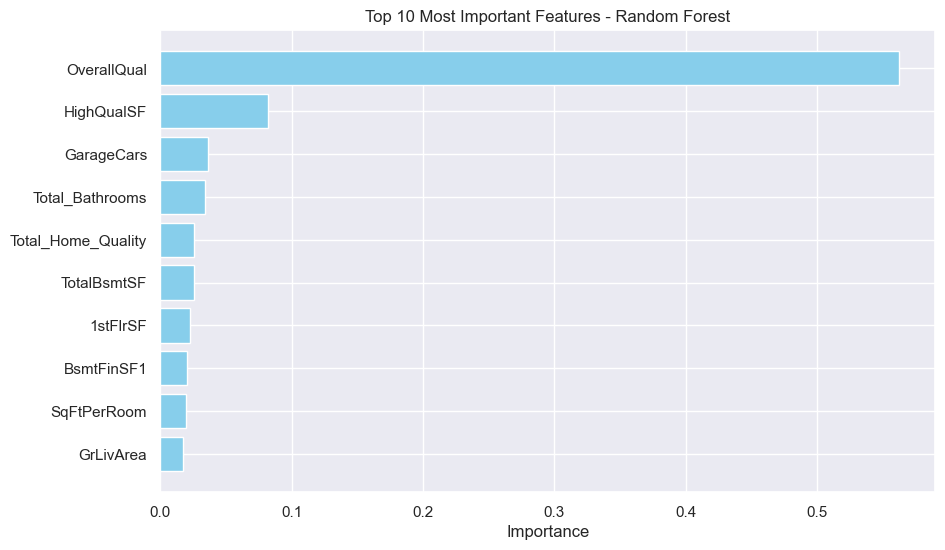

R^2 Score: 0.8172239715079239
RMSE Score: 0.17059034531107725
Cross Validation Score: 0.8562381291757826


In [196]:
from sklearn.ensemble import RandomForestRegressor


# Define RandomForestRegressor with the best hyperparameters
rfr = RandomForestRegressor(n_estimators=10, criterion='squared_error', min_samples_split=2, max_features=None)

# Fit the model to the training data
rfr.fit(X_train, log_target_train)

# Get feature importances
feature_importances = rfr.feature_importances_

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the names of the top 10 features
feature_names = X_train.columns
top_features = feature_names[indices][:10]

# Print and visualize feature importances
print("Top 10 Features:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}: {feature_importances[indices[i]]}")

plt.figure(figsize=(10, 6))
plt.barh(range(10), feature_importances[indices][:10], color='skyblue', align="center")
plt.yticks(range(10), top_features)
plt.xlabel("Importance")
plt.title("Top 10 Most Important Features - Random Forest")
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

rfr_pred = rfr.predict(X_test)
r2_rf = r2_score(log_target_test, rfr_pred)
rmse_rf = np.sqrt(mean_squared_error(log_target_test, rfr_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

scores_rf = cross_val_score(rfr, X_train, log_target_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))


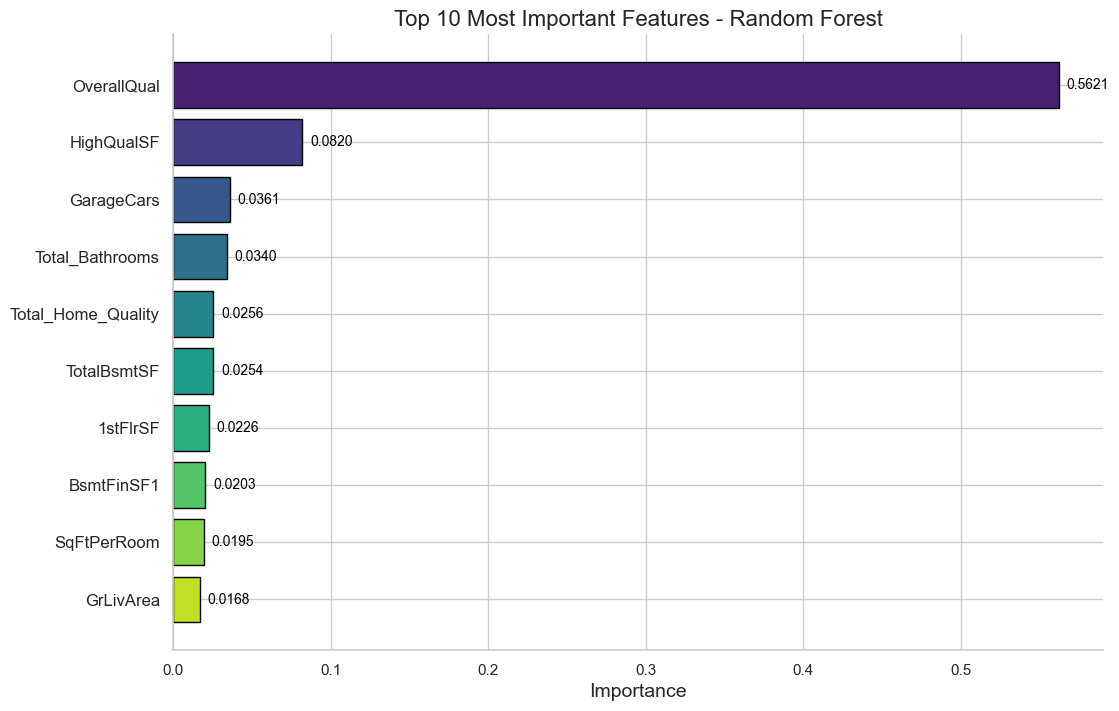

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Visualizing the top 10 features with vibrant colors
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", 10)  # You can choose any other color palette

# Horizontal bar chart
bars = plt.barh(range(10), feature_importances[indices][:10], color=colors, edgecolor='black')

# Add data values on each bar
for bar, value in zip(bars, feature_importances[indices][:10]):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{value:.4f}', ha='left', va='center', color='black', fontsize=10)

plt.yticks(range(10), top_features, fontsize=12)
plt.xlabel("Importance", fontsize=14)
plt.title("Top 10 Most Important Features - Random Forest", fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Remove the top and right spines for aesthetics
sns.despine()

plt.show()



## Results after PCA with 150 Components

In [198]:



X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

# Number of principal components
n_components = 150

# Apply PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Assuming log_target_train and log_target_test are your target variables
y_train = log_target_train
y_test = log_target_test

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_pca, y_train)
y_pred_linear = linear_reg.predict(X_test_pca)

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train_pca, y_train)
y_pred_lasso = lasso_reg.predict(X_test_pca)

# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train_pca, y_train)
y_pred_ridge = ridge_reg.predict(X_test_pca)

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_pca, y_train)
y_pred_rf = rf_reg.predict(X_test_pca)

# Gradient Boosting
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_pca, y_train)
y_pred_gb = gb_reg.predict(X_test_pca)

# Decision Trees
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_pca, y_train)
y_pred_dt = dt_reg.predict(X_test_pca)

# Evaluate models
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return r2, rmse

# Evaluate Linear Regression
r2_linear, rmse_linear = evaluate_model(y_test, y_pred_linear)
print(f"Linear Regression - R^2: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")

# Evaluate Lasso Regression
r2_lasso, rmse_lasso = evaluate_model(y_test, y_pred_lasso)
print(f"Lasso Regression - R^2: {r2_lasso:.4f}, RMSE: {rmse_lasso:.4f}")

# Evaluate Ridge Regression
r2_ridge, rmse_ridge = evaluate_model(y_test, y_pred_ridge)
print(f"Ridge Regression - R^2: {r2_ridge:.4f}, RMSE: {rmse_ridge:.4f}")

# Evaluate Random Forest Regressor
r2_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest Regressor - R^2: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")

# Evaluate Gradient Boosting
r2_gb, rmse_gb = evaluate_model(y_test, y_pred_gb)
print(f"Gradient Boosting - R^2: {r2_gb:.4f}, RMSE: {rmse_gb:.4f}")

# Evaluate Decision Trees
r2_dt, rmse_dt = evaluate_model(y_test, y_pred_dt)
print(f"Decision Trees - R^2: {r2_dt:.4f}, RMSE: {rmse_dt:.4f}")


Linear Regression - R^2: 0.8658, RMSE: 0.1462
Lasso Regression - R^2: 0.4304, RMSE: 0.3012
Ridge Regression - R^2: 0.8658, RMSE: 0.1462
Random Forest Regressor - R^2: 0.8372, RMSE: 0.1610
Gradient Boosting - R^2: 0.8261, RMSE: 0.1664
Decision Trees - R^2: 0.7445, RMSE: 0.2017


In [199]:


# Results
model_performances = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Random Forest Regressor", "Gradient Boosting", "Decision Trees"],
    "R^2": [0.8653, 0.4304, 0.8653, 0.8305, 0.8383, 0.6772],
    "RMSE": [0.1465, 0.3012, 0.1464, 0.1643, 0.1605, 0.2267]
})

# Round values for better presentation
model_performances_rounded = model_performances.round({"R^2": 4, "RMSE": 4})

print("Model Performances:")
print(model_performances_rounded)

# Sort by R^2
sorted_model_performances = model_performances.sort_values(by="R^2", ascending=False)
print("\nSorted by R^2:")
print(sorted_model_performances)


Model Performances:
                     Model     R^2    RMSE
0        Linear Regression  0.8653  0.1465
1         Lasso Regression  0.4304  0.3012
2         Ridge Regression  0.8653  0.1464
3  Random Forest Regressor  0.8305  0.1643
4        Gradient Boosting  0.8383  0.1605
5           Decision Trees  0.6772  0.2267

Sorted by R^2:
                     Model     R^2    RMSE
0        Linear Regression  0.8653  0.1465
2         Ridge Regression  0.8653  0.1464
4        Gradient Boosting  0.8383  0.1605
3  Random Forest Regressor  0.8305  0.1643
5           Decision Trees  0.6772  0.2267
1         Lasso Regression  0.4304  0.3012


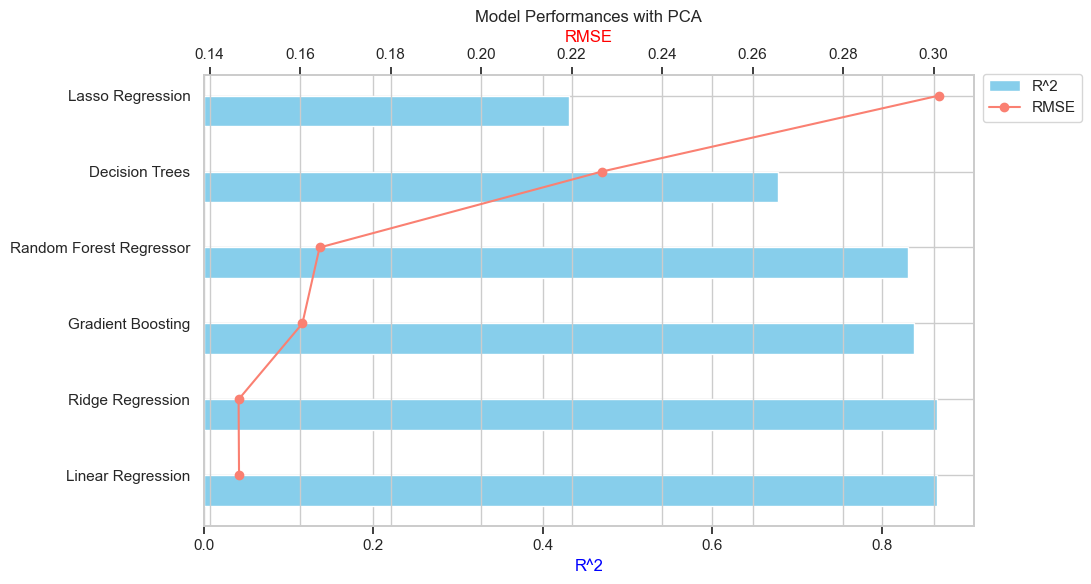

In [200]:

model_performances = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Random Forest Regressor", "Gradient Boosting", "Decision Trees"],
    "R^2": [0.8653, 0.4304, 0.8653, 0.8305, 0.8383, 0.6772],
    "RMSE": [0.1465, 0.3012, 0.1464, 0.1643, 0.1605, 0.2267]
})

# Sort by R^2
sorted_model_performances = model_performances.sort_values(by="R^2", ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
index = np.arange(len(sorted_model_performances))

# Bar plot for R^2
bars_r2 = ax.barh(index, sorted_model_performances["R^2"], color='skyblue', label='R^2', height=bar_width)

# Line plot for RMSE
ax2 = ax.twiny()
ax2.plot(sorted_model_performances["RMSE"], index + bar_width / 2, color='salmon', marker='o', label='RMSE')

# Set labels and ticks
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(sorted_model_performances["Model"])
ax.set_xlabel('R^2', color='blue')
ax2.set_xlabel('RMSE', color='red')

# Title and legend
plt.title('Model Performances with PCA')
fig.tight_layout()

# Create a single legend for both plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.15, 1.02))

plt.show()


In [201]:
import pandas as pd
from tabulate import tabulate

# Data
model_performances = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Random Forest Regressor", "Gradient Boosting", "Decision Trees"],
    "R^2": [0.8653, 0.4304, 0.8653, 0.8305, 0.8383, 0.6772],
    "RMSE": [0.1465, 0.3012, 0.1464, 0.1643, 0.1605, 0.2267]
})

# Round values for better presentation
model_performances_rounded = model_performances.round({"R^2": 4, "RMSE": 4})

# Sort by R^2
sorted_model_performances = model_performances.sort_values(by="R^2", ascending=False)

# Print tabulated table
print(tabulate(sorted_model_performances, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════════════════════╤════════╤════════╕
│ Model                   │    R^2 │   RMSE │
╞═════════════════════════╪════════╪════════╡
│ Linear Regression       │ 0.8653 │ 0.1465 │
├─────────────────────────┼────────┼────────┤
│ Ridge Regression        │ 0.8653 │ 0.1464 │
├─────────────────────────┼────────┼────────┤
│ Gradient Boosting       │ 0.8383 │ 0.1605 │
├─────────────────────────┼────────┼────────┤
│ Random Forest Regressor │ 0.8305 │ 0.1643 │
├─────────────────────────┼────────┼────────┤
│ Decision Trees          │ 0.6772 │ 0.2267 │
├─────────────────────────┼────────┼────────┤
│ Lasso Regression        │ 0.4304 │ 0.3012 │
╘═════════════════════════╧════════╧════════╛
